In [5]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [6]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df= pds.read_csv(path, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [11]:
lm=LinearRegression()
x=df[['CPU_frequency']]
y=df['Price']
lm.fit(x,y)
Yhat=lm.predict(x)
b=lm.coef_
a=lm.intercept_
print(f'yhat={a.item():.2f}+{b.item():.2f}*x')


yhat=253.66+1485.19*x


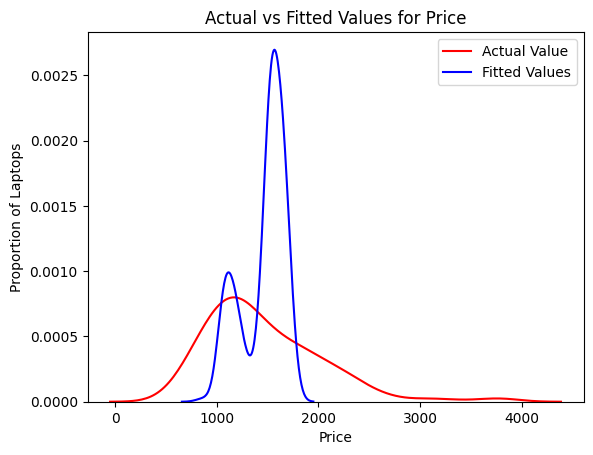

In [12]:
ax=sns.kdeplot(y, color='r', label='Actual Value')
sns.kdeplot(Yhat, color='b', label='Fitted Values', ax=ax) 
plt.title('Actual vs Fitted Values for Price')  
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend()
plt.show()
plt.close()


In [14]:
print('The r squared is', lm.score(x, y), 'and the MSE is', mean_squared_error(y, Yhat))


The r squared is 0.1344436321024326 and the MSE is 284583.4405868629


In [15]:
z=df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU','Category']]
lm2=LinearRegression()
lm2.fit(z, y)
Yhat2=lm2.predict(z)

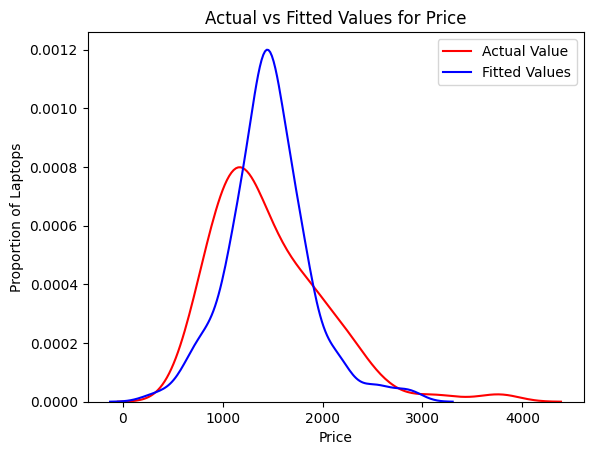

In [16]:
ax2=sns.kdeplot(y, color='r', label='Actual Value')
sns.kdeplot(Yhat2, color='b', label='Fitted Values', ax=ax2)
plt.title('Actual vs Fitted Values for Price')  
plt.xlabel('Price')
plt.ylabel('Proportion of Laptops')
plt.legend()
plt.show()
plt.close()


In [17]:
print('The r squared is', lm.score(x, y), 'and the MSE is', mean_squared_error(y, Yhat))
print('The r squared is', lm2.score(z, y), 'and the MSE is', mean_squared_error(y, Yhat2))  


The r squared is 0.1344436321024326 and the MSE is 284583.4405868629
The r squared is 0.5082509055187376 and the MSE is 161680.57263893104


In [22]:
X=x.to_numpy().flatten()
f1=np.polyfit(X, y, 1)
p1=np.poly1d(f1)

f3=np.polyfit(X, y, 3)
p3=np.poly1d(f3)

f5=np.polyfit(X, y, 5)
p5=np.poly1d(f5)

In [23]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

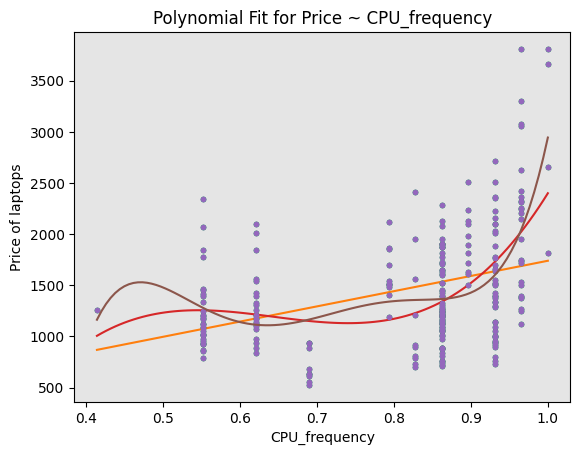

In [24]:
PlotPolly(p1, X, y, 'CPU_frequency')
PlotPolly(p3, X, y, 'CPU_frequency')
PlotPolly(p5, X, y, 'CPU_frequency')

In [25]:
print('The r squared is', r2_score(y, p1(X)), 'and the MSE is', mean_squared_error(y, p1(X)))
print('The r squared is', r2_score(y, p3(X)), 'and the MSE is', mean_squared_error(y, p3(X)))   
print('The r squared is', r2_score(y, p5(X)), 'and the MSE is', mean_squared_error(y, p5(X)))   

The r squared is 0.1344436321024326 and the MSE is 284583.4405868629
The r squared is 0.2669264079653113 and the MSE is 241024.86303848765
The r squared is 0.3030822706443915 and the MSE is 229137.29548053455


In [26]:
input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]  
pipe=Pipeline(input)
Z=z.astype(float)
pipe.fit(Z, y)
ypipe=pipe.predict(Z)
ypipe[0:4]

array([1484.18227261,  778.36551848, 1267.81424349, 1009.69942066])

In [27]:
print('The r squared is', r2_score(y, ypipe), 'and the MSE is', mean_squared_error(y, ypipe))   
print('The r squared is', lm2.score(z, y), 'and the MSE is', mean_squared_error(y, Yhat2))  


The r squared is 0.6332094535859658 and the MSE is 120595.86128028373
The r squared is 0.5082509055187376 and the MSE is 161680.57263893104
